# SQLalchemy, Pandas, Matplotlib
1. Import the SQL database into Pandas.
2. Create a histogram to visualize the most common salary ranges for employees.
3. Create a bar chart of average salary by title.


In [1]:
import psycopg2
import pandas as pd
import sqlalchemy
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
user = 'postgres'
password = 'xxxxxxxx'
host = 'localhost'
port = 5432  
dbname = 'EmployeeSQL'

engine = create_engine(f'postgres://{user}:{password}@{host}:{port}/{dbname}')
conn = engine.connect()

In [3]:
#read employees table from employeesSQL DB
employee = pd.read_sql('select * from public.employees', conn)
#rename title_id columns to prep for later merge with titles table
employee = employee.rename(columns = {"emp_title_id" : "title_id"})
employee.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [4]:
#read departments table from employeesSQL DB
departments = pd.read_sql('select * from public.departments', conn)
departments.head()

,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development


In [5]:
#read dept_emp table from employeesSQL DB
dept_emp = pd.read_sql('select * from public.dept_emp', conn)
dept_emp.head()

,emp_no,dept_no
0,10001,d005
1,10002,d007
2,10003,d004
3,10004,d004
4,10005,d003


In [6]:
#read dept_manager table from employeesSQL DB
dept_manager = pd.read_sql('select * from public.dept_manager', conn)
dept_manager.head()

,dept_no,emp_no
0,d001,110022
1,d001,110039
2,d002,110085
3,d002,110114
4,d003,110183


In [7]:
#read titles table from employeesSQL DB
title = pd.read_sql('select * from public.titles', conn)
title.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [8]:
#read salaries table from employeesSQL DB
salaries = pd.read_sql('select * from public.salaries', conn)
salaries.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


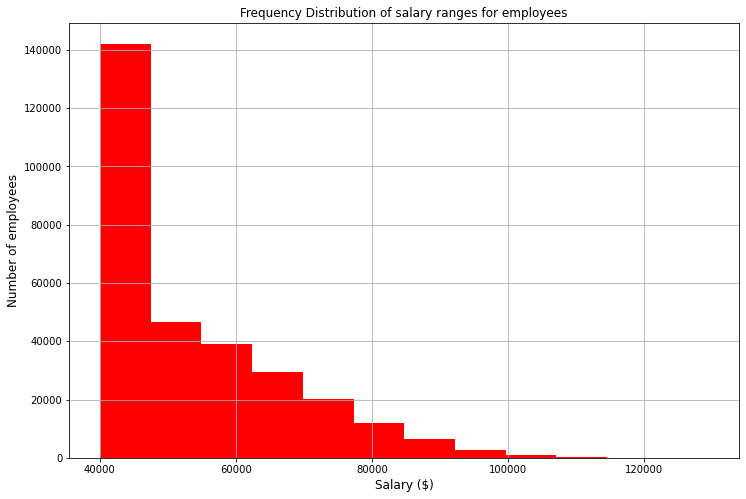

In [9]:
# Visualize the most common salary ranges for employees by using histogram.
plt.figure(figsize=(12, 8))
plt.hist(salaries["salary"], color='red', bins=12)
plt.ylabel(f'Number of employees',fontsize=12)
plt.xlabel('Salary ($)',fontsize=12)
plt.title("Frequency Distribution of salary ranges for employees",fontsize=12)
plt.grid()
plt.savefig("Images/salary_distribution.png", bbox_inches='tight')
plt.show()

In [10]:
#merge 'titles', 'employees', 'salaries' into a dataframe in order to create a bar chart 
merge_df_first = pd.merge(employee, title, on = "title_id")
merge_df_all = pd.merge(merge_df_first, salaries, on = "emp_no")
merge_df_all.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,title,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,Staff,40000
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,Staff,40000
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,Staff,56087
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,Staff,87084
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,Staff,63016


In [11]:
#creat dataFrame of titles and salary
title_sal_df = merge_df_all[["title", "salary"]]
#groupby titles and calculate avarage salary 
avg_salary = title_sal_df.groupby('title').mean()
#reset index to prep for plot
avg_df = avg_salary.reset_index()
avg_df.head()

,title,salary
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Manager,51531.041667
3,Senior Engineer,48506.799871
4,Senior Staff,58550.172704


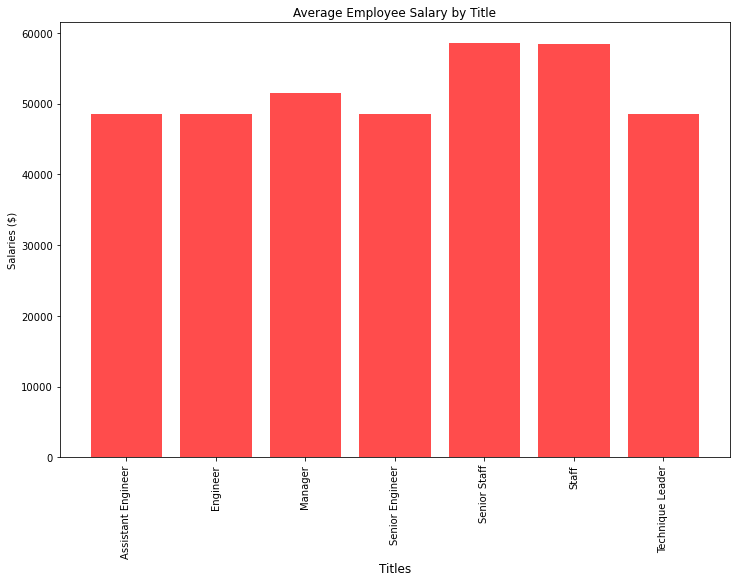

In [12]:
#plot bar chart 
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_axis = avg_df["title"]
ticks = np.arange(len(x_axis))
y_axis = avg_df["salary"]

plt.bar(x_axis, y_axis, align="center",alpha=0.7,color="r" )
plt.xticks(ticks, x_axis, rotation="vertical")

plt.ylabel("Salaries ($)")
plt.xlabel("Titles",fontsize=12)
plt.title("Average Employee Salary by Title",fontsize=12)
plt.savefig("Images/avg_salary.png", bbox_inches='tight')

plt.show()

In [13]:
# On your way out of the office, you hear the words, "Search your ID number."
# You look down at your badge to see that your employee ID number is 499942.
employee_id=pd.read_sql('SELECT*FROM employees as myid WHERE myid.emp_no=499942', conn)
employee_id

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10
